In [21]:
import pandas as pd
from functions.display_plots import FeatureVisualizer
from functions.feature_stats import FeatureStats
from functions.eda_dataset import EdaDataset

# I. Mean Features  
### Overview of Mean-based Measurements

In [22]:
data = pd.read_csv('../data/subsets_preprocessed/subset_mean.csv')
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [23]:
data.drop(columns=['diagnosis']).describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [24]:
# Values: 0: Benign; 1: Malignant
data['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

## 1. Radius Mean

## 1.1. Distribution

###### **radius_mean:** The mean of the distances from the center of the tumor to the perimeter. It reflects the average size of the tumor.

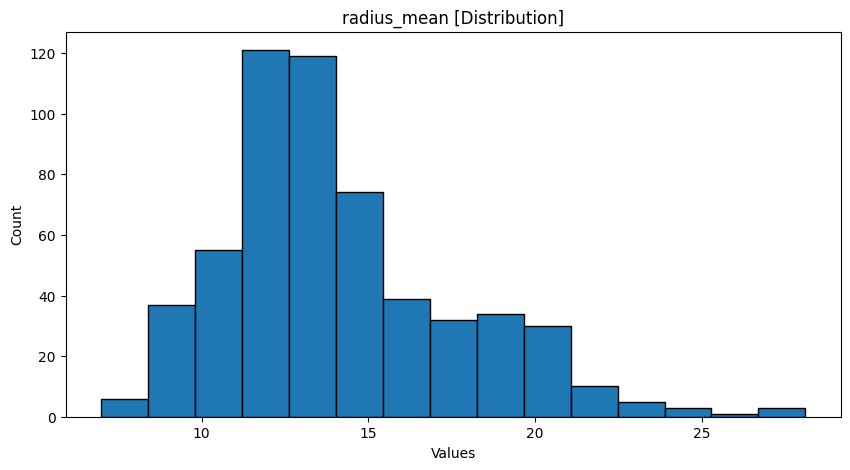

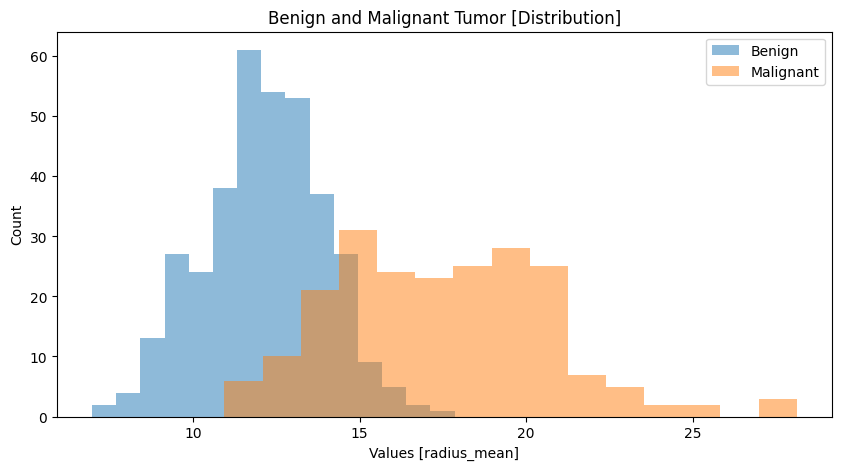

In [25]:
radius_mean_feature = FeatureVisualizer(dataset=data, target_column="diagnosis", feature="radius_mean")
radius_mean_feature.display_all()

### Conclusions
- Benign distribution looks like a normal (Gaussian)
- Malignant distribution looks like a bimodal
- In the next tests determine what are the exact distributions

## 1.2. Statistical analysis with Boxplot and t-test

### Boxplot - Radius Mean
This boxplot illustrate the distribution of `Radius Mean values`, allowing comparison between Negative and Positive results

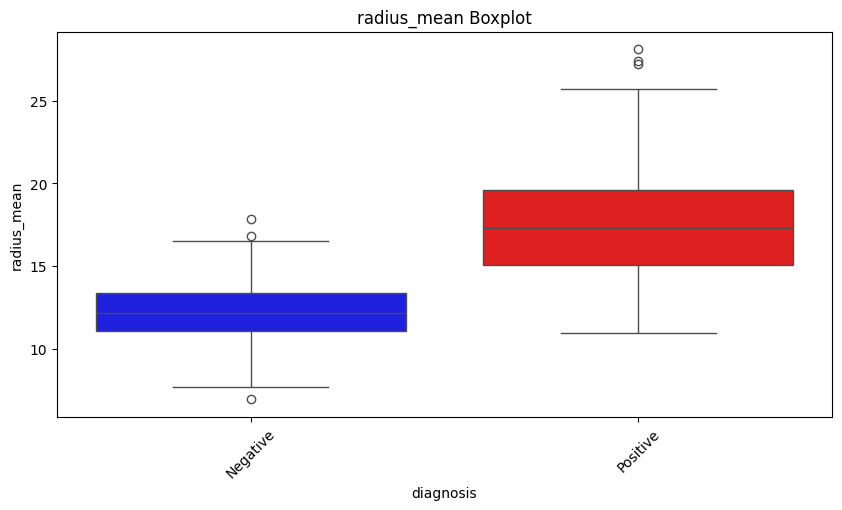

In [26]:
stat_analysis = FeatureStats(dataset=data, target_column='diagnosis', feature='radius_mean')
stat_analysis.display_boxplot()

### t-test analysis
With this test we will determine is there or not relationship between the diagnosis groups and the Radius mean feature.

In [27]:
stat_analysis.display_ttest()

,Feature,t-statistic,p-value
0,radius_mean,-25.435822,8.465941e-96


### Conclusions:
`t-statistic:` measure the difference between the means of two groups relative to the variation within the groups.<br>It shows how many times larger the mean difference is compared to the noise in data<br>
`p-value:`  If **p-value** is too small, we reject $H_0$ (the null hypothesis) as in our case. <br>
It's mean there is significant relationship between the groups.

## 2. Texture Mean

## 2.1. Distribution

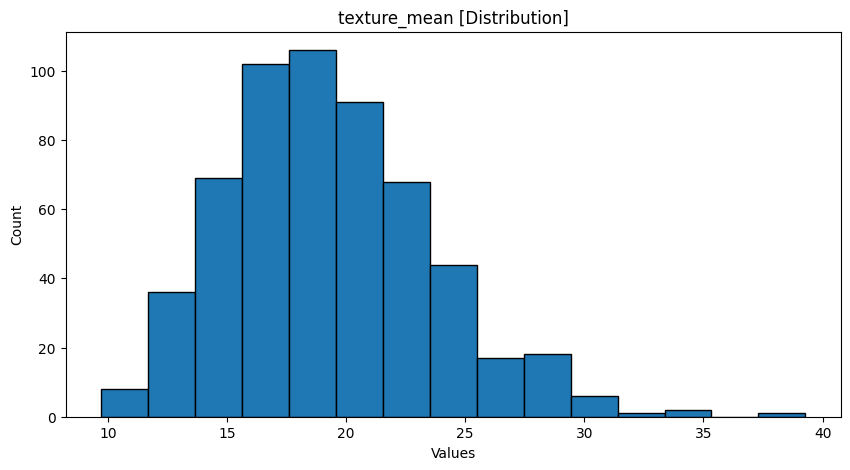

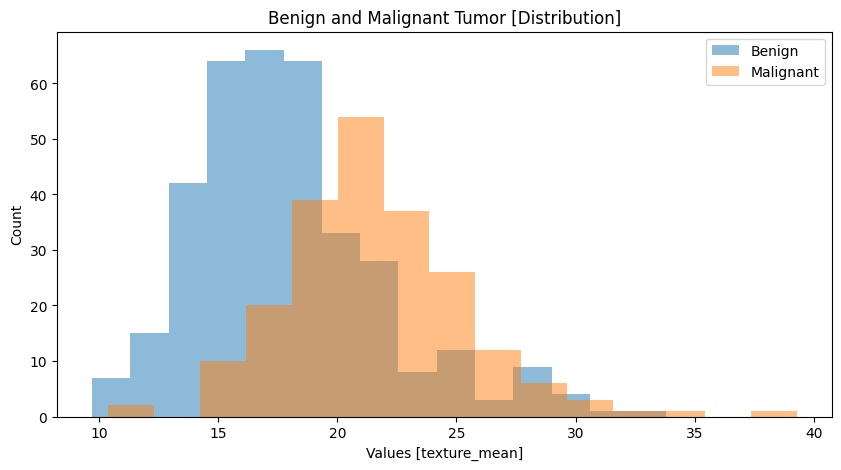

In [28]:
texture_mean_feature = FeatureVisualizer(dataset=data, target_column="diagnosis", feature="texture_mean")
texture_mean_feature.display_all()

### Conclusions
- Benign distribution looks like a normal (Gaussian)
- Malignant distribution looks like a normal (Gaussian)
- In the next tests determine what are the exact distributions

## 2.2. Statistical analysis with Boxplot and t-test

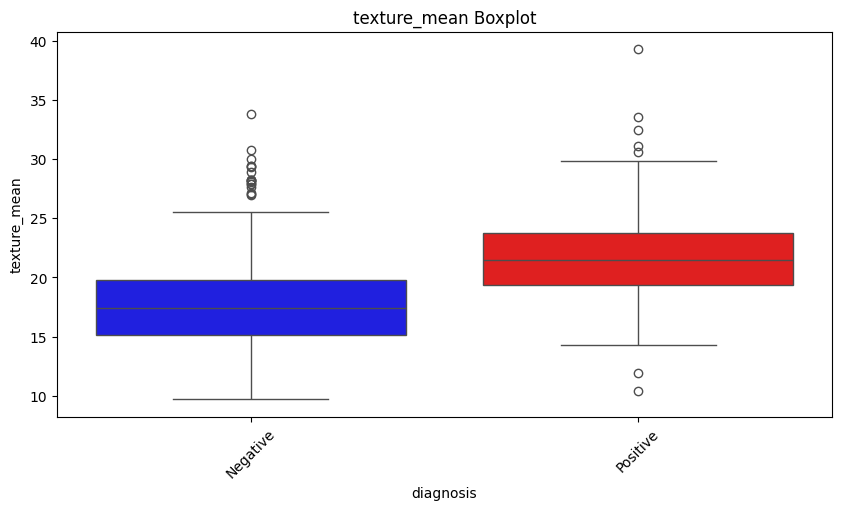

In [29]:
stat_analysis = FeatureStats(dataset=data, target_column='diagnosis', feature='texture_mean')
stat_analysis.display_boxplot()

In [30]:
stat_analysis.display_ttest()

,Feature,t-statistic,p-value
0,texture_mean,-10.867201,4.058636e-25


### Conclusions:
`t-statistic:` measure the difference between the means of two groups relative to the variation within the groups.<br>It shows how many times larger the mean difference is compared to the noise in data<br>
`p-value:`  If **p-value** is too small, we reject $H_0$ (the null hypothesis) as in our case. <br>
It's mean there is significant relationship between the groups.

## 3. Perimeter Mean

## 3.1. Distribution

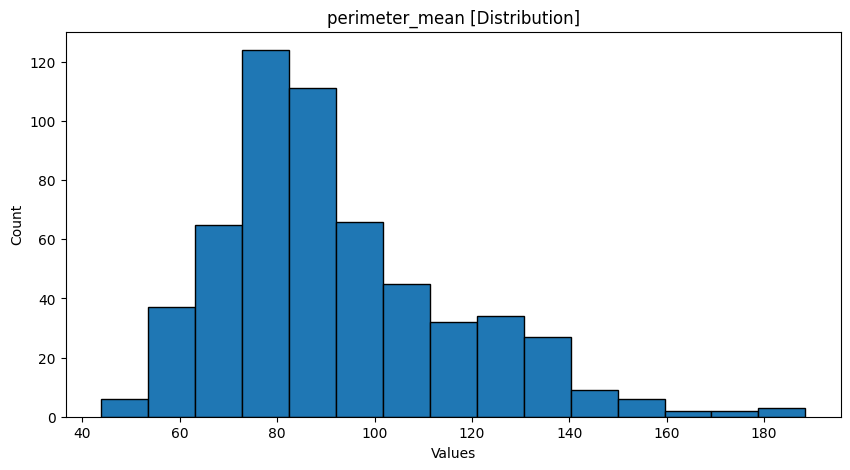

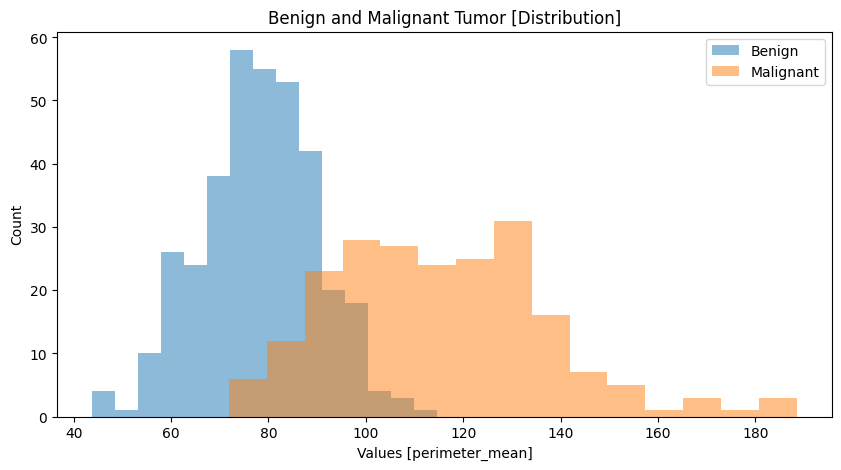

In [31]:
texture_mean_feature = FeatureVisualizer(dataset=data, target_column="diagnosis", feature="perimeter_mean")
texture_mean_feature.display_all()

## 3.2. Statistical analysis with Boxplot and t-test

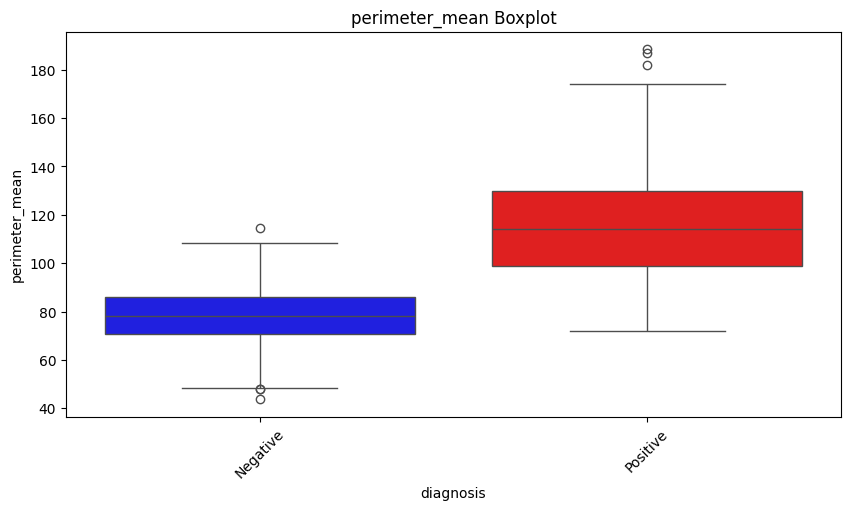

In [32]:
stat_analysis_perimeter_mean = FeatureStats(dataset=data, target_column='diagnosis', feature='perimeter_mean')
stat_analysis_perimeter_mean.display_boxplot()

In [33]:
stat_analysis_perimeter_mean.display_ttest()

,Feature,t-statistic,p-value
0,perimeter_mean,-26.405213,8.436251e-101


## 4. Area Mean
### 4.1. Distribution

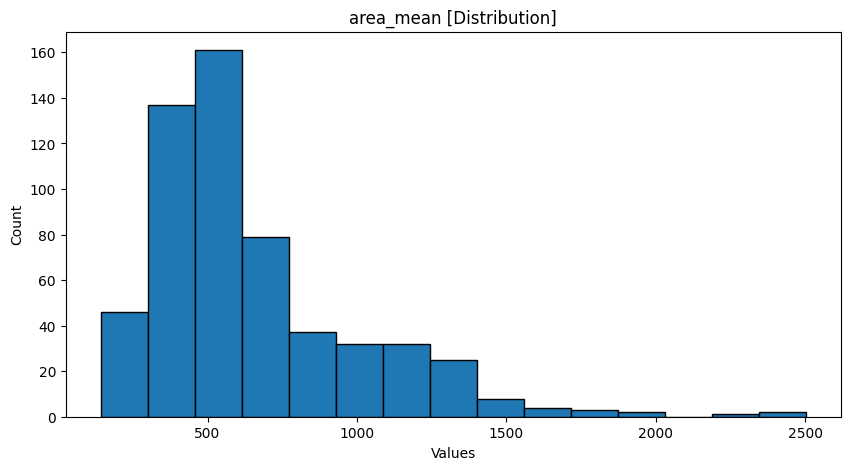

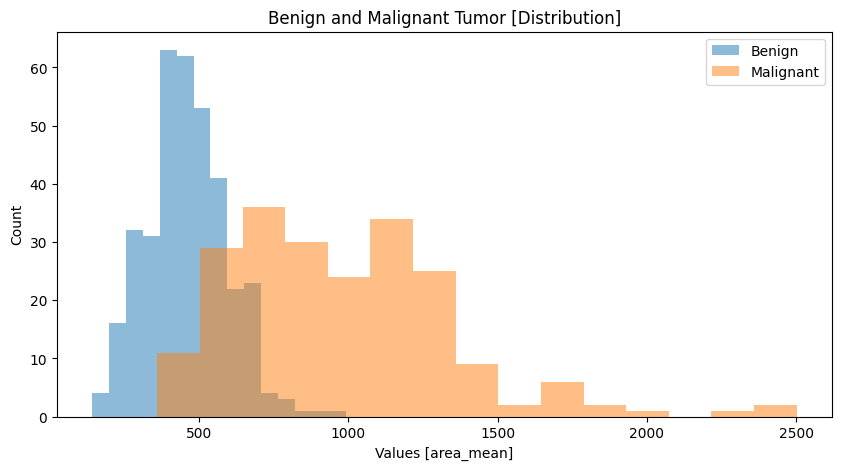

In [35]:
area_mean_feature = FeatureVisualizer(dataset=data, target_column="diagnosis", feature="area_mean")
area_mean_feature.display_all()

## 4.2. Statistical analysis with Boxplot and t-test

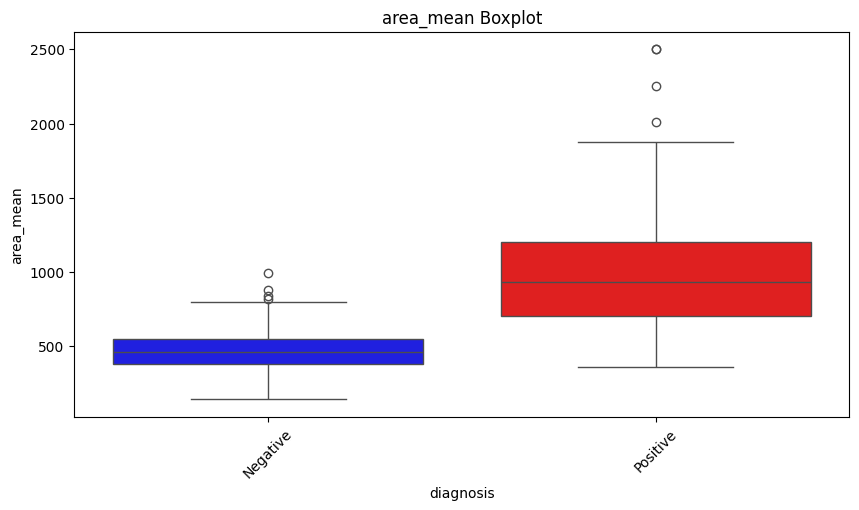

In [36]:
stat_analysis_area_mean = FeatureStats(dataset=data, target_column='diagnosis', feature='area_mean')
stat_analysis_area_mean.display_boxplot()

In [37]:
stat_analysis_area_mean.display_ttest()

,Feature,t-statistic,p-value
0,area_mean,-23.938687,4.734564e-88


## 5. Smoothness Mean
### 5.1 Distribution

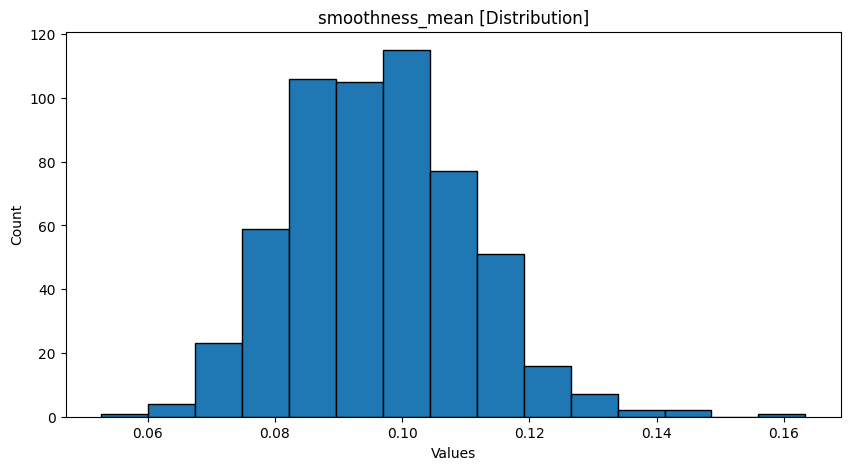

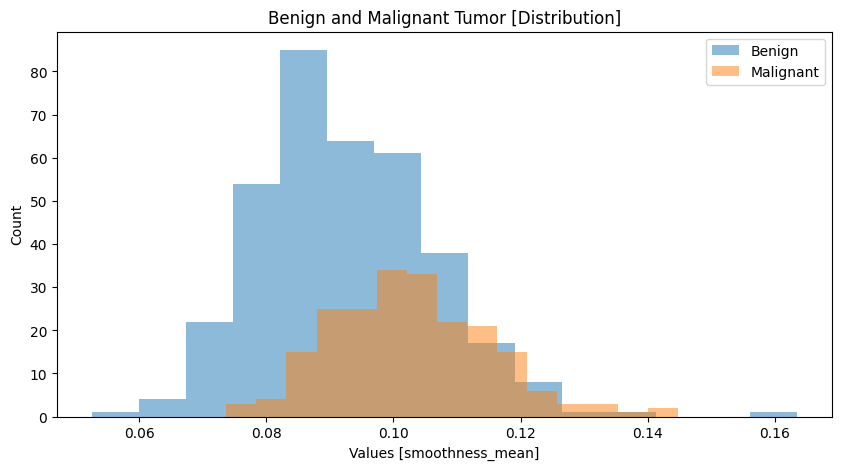

In [39]:
smoothness_mean_feature = FeatureVisualizer(dataset=data, target_column="diagnosis", feature="smoothness_mean")
smoothness_mean_feature.display_all()

## 5.2. Statistical analysis with boxpolot and t-test

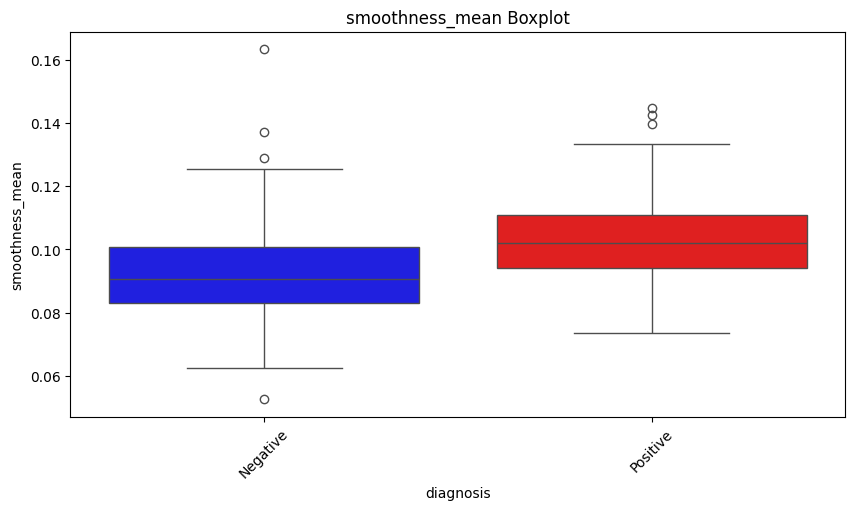

In [40]:
stat_analysis_smoothness_mean = FeatureStats(dataset=data, target_column='diagnosis', feature='smoothness_mean')
stat_analysis_smoothness_mean.display_boxplot()

In [41]:
stat_analysis_smoothness_mean.display_ttest()

,Feature,t-statistic,p-value
0,smoothness_mean,-9.146099,1.051850e-18


## 6. Compactness Mean
### 6.1. Distribution

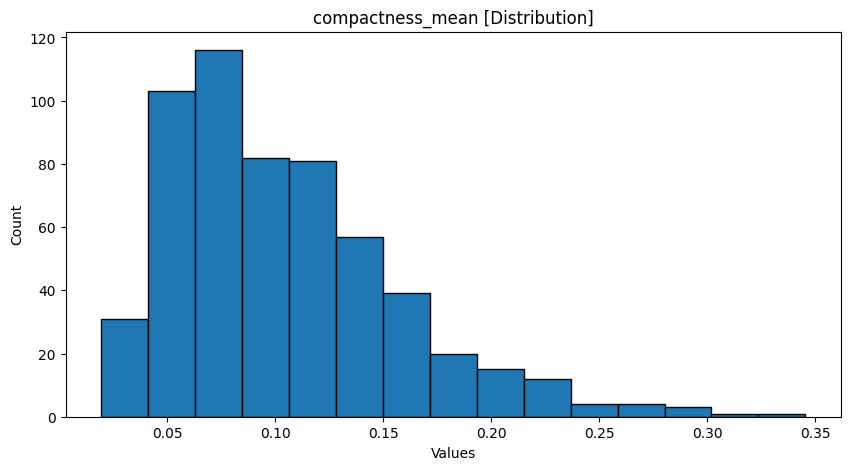

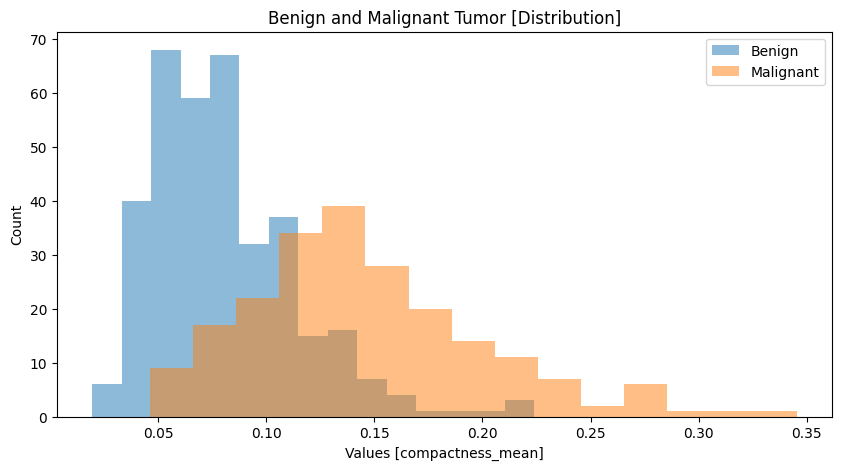

In [43]:
compactness_mean_feature = FeatureVisualizer(dataset=data, target_column="diagnosis", feature="compactness_mean")
compactness_mean_feature.display_all()

## 6.2. Statistical analysis with boxplot and t-test

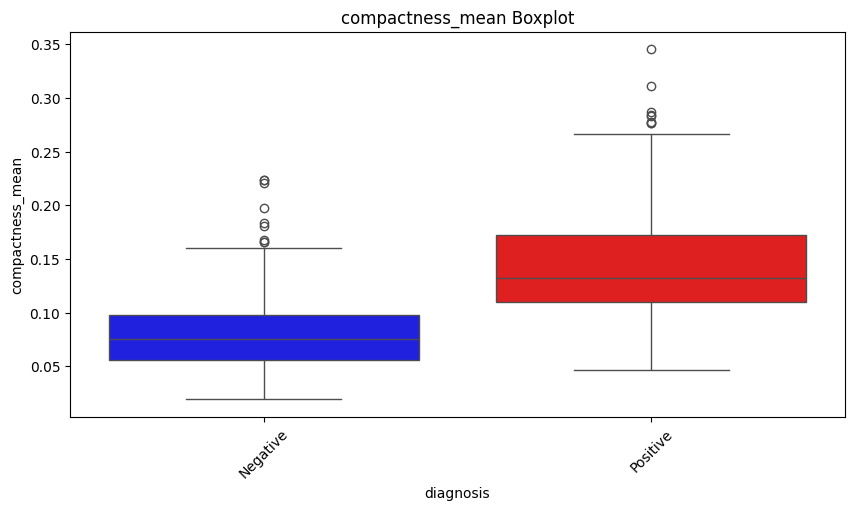

In [44]:
stat_analysis_compactness_mean = FeatureStats(dataset=data, target_column='diagnosis', feature='compactness_mean')
stat_analysis_compactness_mean.display_boxplot()

In [46]:
stat_analysis_compactness_mean.display_ttest()

,Feature,t-statistic,p-value
0,compactness_mean,-17.698392,3.938263e-56


In [47]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


## 7. Concavity Mean
### 7.1. Distribution

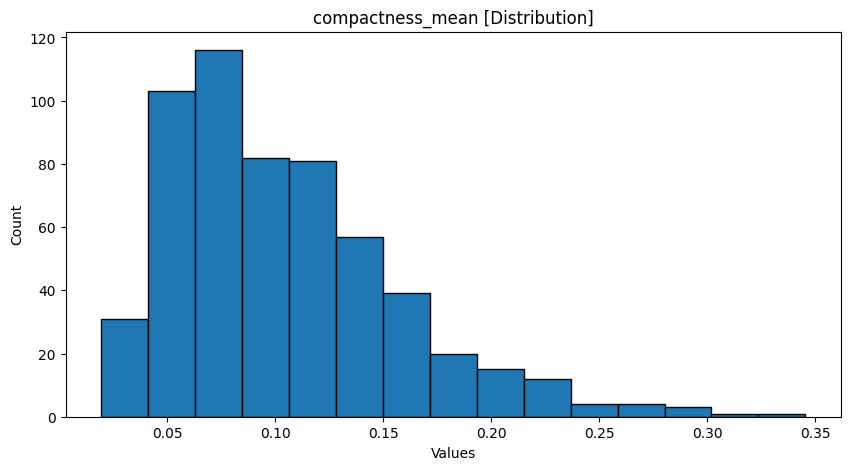

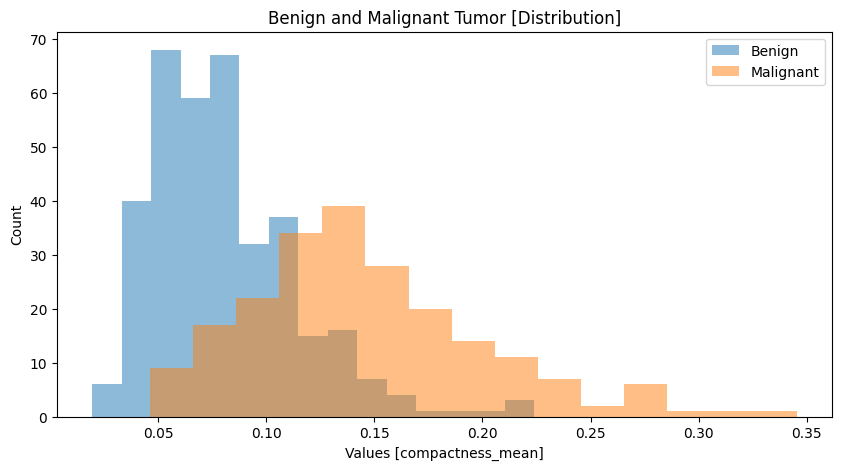

In [48]:
concavity_mean_feature = FeatureVisualizer(dataset=data, target_column="diagnosis", feature="compactness_mean")
concavity_mean_feature.display_all()

In [ ]:
feature_test = EdaDataset(dataset=data, )